In [2]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Introduction to Ensemble Methods

Ensemble methods are techniques for obtaining better predictive performances by using multiple models.

The following dataset comes from a bank which would like to know when a new client arrives if this client will subscribe to a long term deposit.

The bank will be considered as your client in the following parts.

---

**Feel free to create sklearn Pipelines for simplifying the following experiments** 

## Introducing and exploring the dataset

The dataset is located in `../data/bank-full.csv`. It has 17 columns, the target column or $ŷ$ is the column named `y`.

Columns summary  : 

| column name | simple description |
|-------------|------------------------|
| age | age |
| job | type of job |
| marital | marital status |
| education | education level |
| default | has credit in default? |
| balance | average yearly balance, in euros  |
| housing | has housing loan? |
| loan | has personal loan? |
| contact | contact communication |
| month | last contact month of year |
| day_of_week | last contact day of the week |
| duration |  last contact duration in seconds |
| campaign |  number of contacts performed during campaign for this client |
| pday | number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted) |
| previous | number of contacts performed before this campaign and for this client |
| poutcome | outcome of the previous marketing campaign |
| **output :** |  |
| y | has  the client subscribed a term deposit? |

Let's explore the dataset a bit using pandas.

While exploring the dataset it is recommended to create a list of categorical features

In [3]:
import pandas as pd

Create a dataframe with the dataset `../data/bank-full.csv`

In [4]:
# code here
df = pd.read_csv('../data/bank-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Describe the dataset informations

In [5]:
# code here
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Use histogramms to display the features' distribution

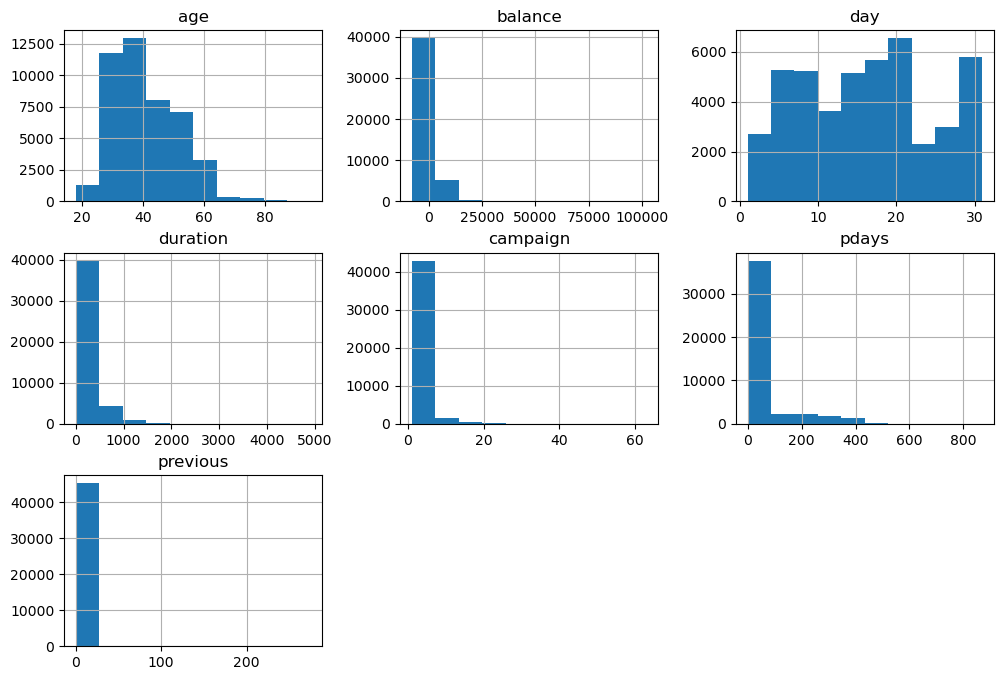

In [6]:
# code here
rcParams['figure.figsize'] = 12,8
plots = df.hist()

Use heatmap to display the numerical features' correlation

In [7]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


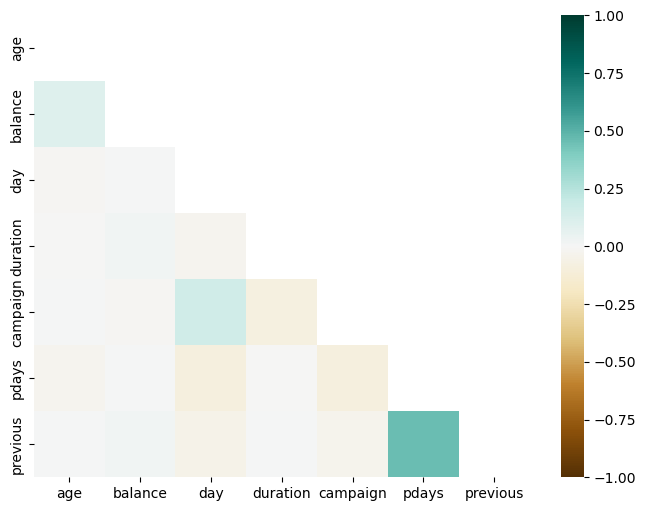

In [8]:
# code here
rcParams['figure.figsize'] = 8,6

sns.heatmap(df[['age','balance','day','duration','campaign','pdays','previous']].corr(), cmap="BrBG", vmin=-1, vmax=1, 
            mask = np.triu(df[['age','balance','day','duration','campaign','pdays','previous']].corr()))
plt.show()

In order to continue the preprocessing, the features `day` and `month` should be merged into one column named `dayoftheyear`.

You can use pandas datetime tools or python datetime librairies for doing this preprocessing.
(the default year used will be 1984)

In [9]:
# code here
# When you can concatenate multiple Series containing string by just summing them.
# However, be sure each Serie contains string, in case use .astype(str)
import datetime
parser = lambda x: datetime.datetime.strptime(x, '%d-%b-%Y')
dayoftheyear = (df.day.astype(str) + '-' + df.month.astype(str) + '-' + '1984').apply(parser).dt.dayofyear
dayoftheyear.head()
df = df.drop(columns=['day', 'month'])
df['dayoftheyear'] = dayoftheyear

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,dayoftheyear
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no,126
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no,126
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no,126
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no,126
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no,126


Now sort the features into categorical and numerical features

In [11]:
df = df.drop('duration', axis = 1)

In [12]:
categorical_features = ['job', 'marital', 'education', 'default', 
                        'housing', 'loan', 'contact', 'poutcome'] 
numerical_features = ['age', 'balance', 'campaign', 'pdays', 'previous', 'dayoftheyear'] 

After a first exploration, categorical/ordinal features (10 columns) need to be encoded in order to become a valid input for the modeling phase.

The different encoders can be found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

(You can also use the function `get_dummies` of pandas for categorical features)

In [13]:
# Create the X and y DataFrames resample the dataframes if necessary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.copy()
y = X.pop('y')

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
# import and create the appropriate encoders 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Pipeline declaration
onehot_transformer = Pipeline([
    ('onehot', OneHotEncoder())
])
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])


# pipeline application 
pipeline = ColumnTransformer(
    transformers = [
         ("onehot", onehot_transformer, categorical_features), 
         ("numeric", numeric_transformer, numerical_features)
    ]) 


# fit & transform my X_train values
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)


# Get feature names from the fitted OneHotEncoder and ordencoder
full_names = pipeline.get_feature_names_out()


# Convert the transformed NumPy array back to a DataFrame with proper column names
X_train_transformed = pd.DataFrame(X_train_transformed, columns=full_names)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=full_names)


At the end of this part, two dataframes are created :

- `X` containing the features (or the matrix $X$)
- `y` containing the label (or $ŷ$)

Display the shape of X and y

In [15]:
# code here
print('Train set:', X_train_transformed.shape)
print('Test set:', X_test_transformed.shape)

Train set: (36168, 38)
Test set: (9043, 38)


Well done! The data is now ready to be splitted into sets and used to train models!

## Modelling phase

The client needs two features :

1. A model, which can be updated without performance loss.
2. A model, that performs well.

In order to highlight decision trees advantages and drawbacks, remove the `duration` column from the `X` dataset.

In [16]:
# déjà fait plus haut

### Dummy Classifier

In [17]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, accuracy_score

print("Proportion of class 0 in the train set : ", 1 - y_train.sum()/len(y_train))

dC = DummyClassifier()

dC.fit(X_train_transformed, y_train)

y_pred = dC.predict(X_test_transformed)
f1 = f1_score(y_test, y_pred)
print("f1 score :", f1)
acc = accuracy_score(y_test, y_pred)
print("accuracy :", acc)

Proportion of class 0 in the train set :  0.8839305463393055
f1 score : 0.0
accuracy : 0.8793541966161672


### Simple Decision Tree

We will experiment both feature by doing the two following steps.

* Training the Decision Tree model with various splits of the dataset (change the `seed` parameter of the `train_test_split` function for obtaining the second dataset)
* The decision tree `max_depth` will be fixed at 3 first

if you need more info you can take a look at the [sklearn decision tree doc](https://scikit-learn.org/stable/modules/tree.html).

In [18]:
# Decision tree model creation and tree visualization
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 3)

clf.fit(X_train_transformed, y_train)
clf.score(X_train_transformed, y_train)

0.8938564476885644

Now, a first model has been created, change the random seed for the train/test split, and create another tree.

This tree should be created with the same hyperparameters than above. 

In [19]:
# create a new train and test dataset with a different seed
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 35)

# fit & transform my X_train values
X_train_transformed2 = pipeline.fit_transform(X_train2)
X_test_transformed2 = pipeline.transform(X_test2)

# Convert the transformed NumPy array back to a DataFrame with proper column names
X_train_transformed2 = pd.DataFrame(X_train_transformed2, columns=full_names)
X_test_transformed2 = pd.DataFrame(X_test_transformed2, columns=full_names)

In [20]:
# Second tree creation

clf.fit(X_train_transformed2, y_train2)
clf.score(X_train_transformed2, y_train2)

0.8931652289316523

What can you tell about the two trees?

The performance of the model is not exactly the same. 

Normally, before creating a model, one or more evaluation metrics should be chosen depending of the client problem.

* Choose different metrics that seem relevant to this problem (see previous lesson on Classification)

* Prepare a scoring list for these metrics.

* Use the cross-validation method to measure these metrics (if you need see : [cross validation sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)). 

*Hint:*  the `cross_validate` method allows you to pass a metric list as parameter (see [doc here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) ).

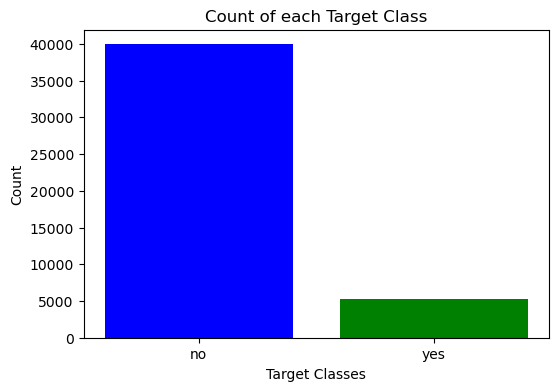

In [21]:
# test if the target is balanced
rcParams['figure.figsize'] = 6,4
plt.bar(df['y'].unique(), df['y'].value_counts(), color = ['b', 'g'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')
plt.show()

In [22]:
# Cross validation on Decision trees
from sklearn.model_selection import cross_val_score

metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'balanced_accuracy']
results = []

for metric in metrics:
    scores = cross_val_score(clf, X_train_transformed, y_train, cv=5, scoring=metric)
    results.append(scores)

results

[array([0.89162289, 0.89604645, 0.89369643, 0.89216093, 0.89119314]),
 array([0.6147541 , 0.78205128, 0.6329588 , 0.66298343, 0.61504425]),
 array([0.17857143, 0.1452381 , 0.20119048, 0.14302741, 0.16567342]),
 array([0.27675277, 0.24497992, 0.30532972, 0.23529412, 0.26103286]),
 array([0.67410426, 0.70805778, 0.68536258, 0.68085909, 0.67251284]),
 array([0.58193507, 0.56996031, 0.5929318 , 0.56674361, 0.57603346])]

Now process the output of your cross-validation in order to know the diversity in performances and the average performance

In [23]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'balanced_accuracy', 'average_precision']

from sklearn.model_selection import cross_validate

clf = DecisionTreeClassifier()

cv_results = cross_validate(clf, X_train_transformed, y_train, cv=5, scoring=scoring)
for metric in scoring:
    print(f"{metric.capitalize()}:")
    print(f"Validation scores: {cv_results[f'test_{metric}']}")
    print("------------------------")

Accuracy:
Validation scores: [0.82844899 0.83301078 0.82126071 0.83354072 0.82897829]
------------------------
Precision:
Validation scores: [0.27845304 0.29418345 0.28200192 0.2956327  0.28829787]
------------------------
Recall:
Validation scores: [0.3        0.31309524 0.34880952 0.31466031 0.32300358]
------------------------
F1:
Validation scores: [0.28882521 0.30334487 0.31186801 0.30484988 0.30466554]
------------------------
Roc_auc:
Validation scores: [0.5989365  0.60720448 0.61606882 0.60814342 0.60918712]
------------------------
Balanced_accuracy:
Validation scores: [0.5989365  0.60720448 0.61606882 0.60814342 0.60918712]
------------------------
Average_precision:
Validation scores: [0.16481874 0.17186967 0.17398011 0.17252063 0.17165021]
------------------------


In [24]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,dayoftheyear
3344,41,blue-collar,married,primary,no,849,yes,no,unknown,1,-1,0,unknown,136
17965,49,technician,married,primary,no,1415,yes,no,cellular,2,-1,0,unknown,212
18299,42,admin.,married,secondary,no,3842,no,no,cellular,4,-1,0,unknown,213
10221,37,management,single,tertiary,no,-119,yes,no,unknown,11,-1,0,unknown,163
32192,56,blue-collar,married,primary,no,3498,no,no,cellular,2,-1,0,unknown,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,housemaid,single,primary,no,1059,no,no,unknown,1,-1,0,unknown,170
44732,23,student,single,tertiary,no,508,no,no,cellular,1,92,1,failure,252
38158,34,technician,divorced,tertiary,no,1317,yes,no,cellular,1,-1,0,unknown,136
860,33,retired,married,secondary,no,165,no,no,unknown,1,-1,0,unknown,128


Plot your metrics performance

/tmp/ipykernel_4574/678229524.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(scoring, rotation=45)


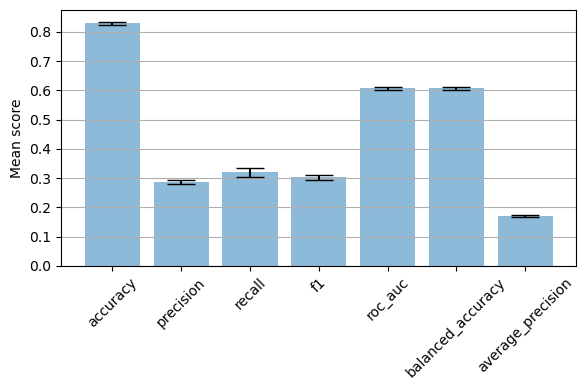

In [25]:
# performance plot
# Compute mean and standard deviation for each metric
mean_scores = []
std_scores = []
for metric in scoring:
    mean_score = np.mean(cv_results[f'test_{metric}'])
    std_score = np.std(cv_results[f'test_{metric}'])
    mean_scores.append(mean_score)
    std_scores.append(std_score)

# Create bar plot
fig, ax = plt.subplots()
ax.bar(scoring, mean_scores, yerr=std_scores, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean score')
ax.set_xticklabels(scoring, rotation=45)
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

#### choose f1

Now choose a single metric to perform a grid search on the `max_depth` of the tree.

In [26]:
#Grid search
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'max_depth': [5, 10, 15]}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(class_weight = 'balanced'),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_transformed, y_train)

# Print the best hyperparameters and their corresponding MSE score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best validation f1: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 5}
Best validation f1:  0.42117223264178805


Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [27]:
# Test metrics
from sklearn.metrics import f1_score

clf = DecisionTreeClassifier(random_state = 0, max_depth = 5, class_weight = 'balanced')

clf.fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)
y_pred_train = clf.predict(X_train_transformed)
f1_train = f1_score(y_train, y_pred_train)
f1 = f1_score(y_test, y_pred)
print("f1 train score:", f1_train)
print("f1 score:", f1)

f1 train score: 0.4386027235050326
f1 score: 0.42857142857142855


### Introducing Ensemble Learning with Bagging models.

Let's train multiple classifiers in parallel in a bootstraping approach! 

Bagging stands for ***Boostrap AGGregatING***.

The following [post](https://blog.octo.com/les-methodes-ensemblistes-pour-algorithmes-de-machine-learning/) will give you an overview of these methods and their advantages and drawbacks

**The train test split using a seed equals to 42 will be used in the following part**

In [28]:
# train_test split (you can copy paste the previously declared cell)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Using Random Forest

The concept of random forest is explained in this [post](https://medium.com/analytics-vidhya/understanding-the-random-forest-algorithm-79b87bdde79a).

Now the best parameters of the previous classifier will be used in a using a bagging classifier
[sklearn : Random Forest Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)

We will use grid search on the `n_estimators` and `max_depth` parameters. 

In [66]:
from sklearn.ensemble import RandomForestClassifier

# gridsearch for the Random Forest classifier
param_grid = {
    'n_estimators': [25, 50, 100], 
    'max_depth': [5, 10, 15]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight = 'balanced_subsample'),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_transformed, y_train)

# Print the best hyperparameters and their corresponding MSE score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best validation f1: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 15, 'n_estimators': 50}
Best validation f1:  0.43166523094724785


How much estimators should we use for obtaining an optimal result? (in terms of time and performance)

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [ ]:
# Test metrics
rf = RandomForestClassifier(**grid_search.best_params_, class_weight = 'balanced_subsample')
# class_weight = 'balanced_subsample' is to used when reponses are heavely balanced

rf.fit(X_train_transformed, y_train)
y_pred = rf.predict(X_test_transformed)
f1 = f1_score(y_test, y_pred)
print("Test f1 score :", f1)

#### Other Random Forest effect

The random forest model can attribute an importance value to features, [explanations here](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

Let's train another random forest and display an histogramm with it :

In [68]:
# training and display features' importance.
# tell them to use the RandomForest Object

#Sort features by importance for the RFR
importances = rf.feature_importances_
feature_names = X_train_transformed.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(len(indices)):
    print(f"{f + 1}. {feature_names[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. numeric__dayoftheyear (0.16811166959989007)
2. numeric__balance (0.11904081084583541)
3. numeric__age (0.10995516490522911)
4. onehot__poutcome_success (0.08682551212825936)
5. numeric__pdays (0.06269634648083801)
6. onehot__contact_unknown (0.057729121634750025)
7. numeric__campaign (0.05672089648456557)
8. onehot__contact_cellular (0.03266799833417544)
9. onehot__housing_yes (0.03236543079051817)
10. numeric__previous (0.031388666715285195)
11. onehot__housing_no (0.030820579065983657)
12. onehot__marital_married (0.015251917512898757)
13. onehot__marital_single (0.013107312331520082)
14. onehot__loan_no (0.012485515569721219)
15. onehot__loan_yes (0.012116259361148672)
16. onehot__education_tertiary (0.012037300352240902)
17. onehot__job_blue-collar (0.011339292835677878)
18. onehot__education_secondary (0.010880018490688885)
19. onehot__poutcome_unknown (0.01021628994519612)
20. onehot__poutcome_failure (0.009836934411787238)
21. onehot__job_technician (0.008863

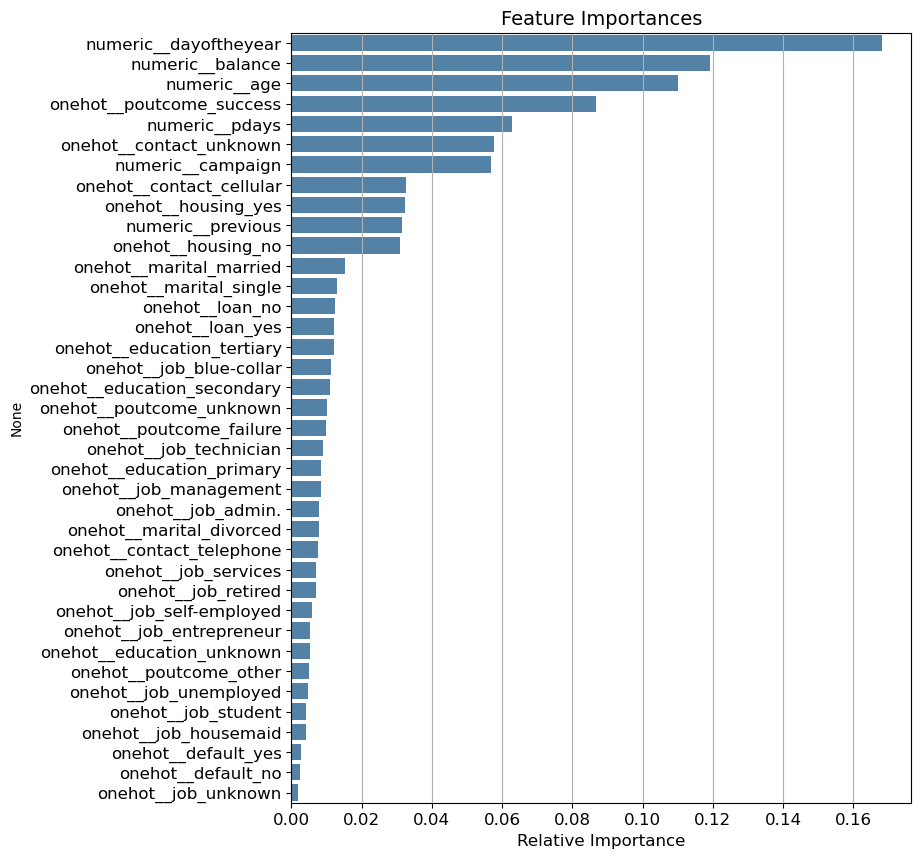

In [69]:
# Sort feature importances in ascending order
indices = np.argsort(importances)[::-1]
# Create horizontal bar chart of feature importances
plt.figure(figsize=(8, 10))
plt.title("Feature Importances", fontsize=14)
sns.barplot(x=importances[indices], y=feature_names[indices], color='steelblue')
plt.xlabel("Relative Importance", fontsize=12)
plt.grid(True, axis='x')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

What is the most important feature?

*Day of the year and balance are the most important features regarding the number of predictors.*

A lot of features have low importance and probably add noise which reduce the performance of the classifier, do a feature selection by recursive elemination to automatically select the subset of features that gives you the best model predictions.

You can have a look at : 

https://scikit-learn.org/stable/modules/feature_selection.html

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

In [71]:
# Feature selection with recursive elimination
# Do another grid search on your model with the subset of selected features
from sklearn.feature_selection import RFECV

rf = RandomForestClassifier(**grid_search.best_params_, class_weight = 'balanced_subsample')
# class_weight = 'balanced_subsample' is to used when reponses are heavely balanced
rfecv = RFECV(estimator=rf, cv=5, scoring='f1', verbose=2)
selector=rfecv.fit(X_train_transformed, y_train)

Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 fe

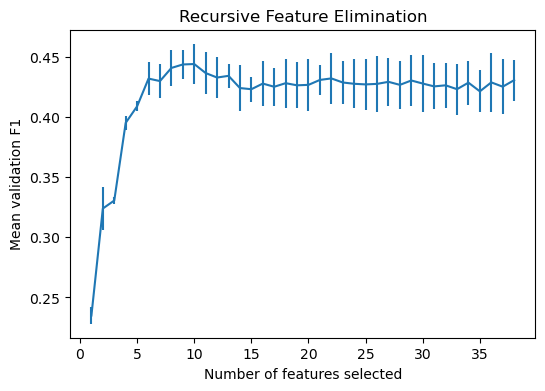

In [72]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean validation F1")
plt.errorbar(
    range(1,n_scores+1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination")
plt.show()

In [78]:
selected_feature_names = rfecv.get_feature_names_out()

param_grid = {
    'n_estimators': [25, 50, 100], 
    'max_depth': [5, 10, 15]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight = 'balanced_subsample'),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_transformed[selected_feature_names], y_train)

# Print the best hyperparameters and their corresponding MSE score
print("Selected features: ", selected_feature_names)
print("Best hyperparameters: ", grid_search.best_params_)
print("Best validation F1: ", grid_search.best_score_)

Selected features:  ['onehot__housing_no' 'onehot__housing_yes' 'onehot__contact_unknown'
 'onehot__poutcome_success' 'numeric__age' 'numeric__balance'
 'numeric__campaign' 'numeric__pdays' 'numeric__previous'
 'numeric__dayoftheyear']
Best hyperparameters:  {'max_depth': 10, 'n_estimators': 100}
Best validation F1:  0.4555540099464891


In [79]:
#Finally we ccan tune the threshold with a cross validation
from sklearn.model_selection import cross_val_predict
rf = RandomForestClassifier(**grid_search.best_params_, class_weight = 'balanced_subsample')

y_train_probas = cross_val_predict(rf, X_train_transformed[selected_feature_names], y_train, cv=5, method='predict_proba')[:,1]

thresholds = np.linspace(0,1,101)
f1s = [ f1_score(y_train, y_train_probas > t ) for t in thresholds ]

best_threshold = thresholds[ np.argmax(f1s) ]
rf.fit(X_train_transformed[selected_feature_names], y_train)
y_test_probas = rf.predict_proba(X_test_transformed[selected_feature_names])[:,1]
print("Best threshold: ", best_threshold)
print("Final test f1 : ", f1_score(y_test, y_test_probas > best_threshold ))
    

Best threshold:  0.56
Final test f1 :  0.46969054684188216


We removed the duration feature in our dataset

Read this feature description on the dataset description ([here on data.world](https://data.world/uci/bank-marketing) or [here on kaggle](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)).

How would the previously trained models perform with this feature?

*The `duration` feature is highly correlated with the target `y` but is not a predictor.*  
*In fact, customers are called only where they have problems, but the fact they are called or not is not a predictor of their situation*  
  
*Due to the high correlation, `duration` would get a hight feature importance score despite being not a predictor.* 


### Continue Ensemble Learning with boosting techniques

Bagging permits to average the results of separated models, whereas the boosting technique trains a classifier and optimizes it in function of its error.

Some information about boosting techniques are on the [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting) but a commonly used library for these techniques is [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html) there are some compatibilities with the sklearn methods (gridsearch, cross validation,...)

- install the `xgboost` package

*Read the articles in resources for a complete explanation.*

In this part a classifier will be trained and evaluated.

In [39]:
# use the same split and seed than you used before

*Hint:* An example for integrating `XGBoost` with  the `sklearn` tools is available [here](https://medium.com/@juniormiranda_23768/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a)

In [40]:
import xgboost as xgb

Let's build a new model than before with a grid search on the `n_estimators` and `max_depth` parameters.

In [41]:
from sklearn.utils.class_weight import compute_sample_weight

model_xg = xgb.XGBClassifier()

model_xg.fit(X_train_transformed, y_train, sample_weight=compute_sample_weight("balanced", y_train))

y_pred = model_xg.predict(X_test_transformed)
f1 = f1_score(y_test, y_pred)
print("f1 score :", f1)

/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or

f1 score : 0.45470444211262684


/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or

In [75]:
# gridsearch 
param_grid = {
    'n_estimators': [25, 50, 100], 
    'max_depth': [5, 10, 15]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator = xgb.XGBClassifier(),
    param_grid = param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_transformed, y_train, sample_weight=compute_sample_weight("balanced", y_train))

# Print the best hyperparameters and their corresponding MSE score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best f1: ", grid_search.best_score_)

/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:


Best hyperparameters:  {'max_depth': 5, 'n_estimators': 100}
Best f1:  0.4443470679214979


Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [76]:
# Test metrics
model_xg = xgb.XGBClassifier(**grid_search.best_params_)

model_xg.fit(X_train_transformed, y_train, sample_weight=compute_sample_weight("balanced", y_train))

y_pred = model_xg.predict(X_test_transformed)
f1 = f1_score(y_test, y_pred)
print("f1 score :", f1)

/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or

f1 score : 0.4479201331114808


/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or

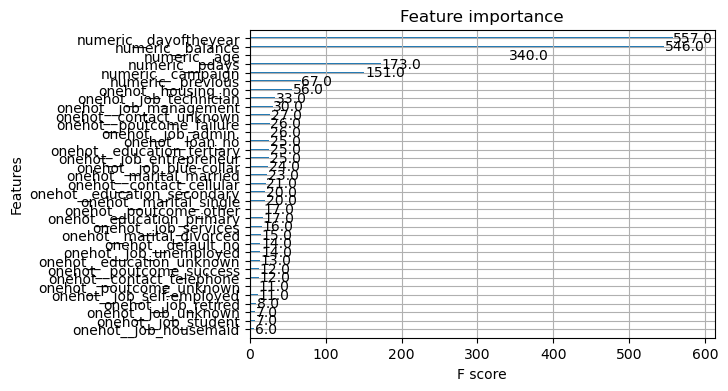

In [77]:
# performance curves
xgb.plot_importance(model_xg)
plt.show()

## Let's Conclude

Report your test set metrics for the three methods here

In [80]:
# Decision Tree on test set
clf = DecisionTreeClassifier(random_state = 0, max_depth = 5, class_weight = 'balanced')
clf.fit(X_train_transformed, y_train)

y_pred_train = clf.predict(X_train_transformed)
y_pred_test = clf.predict(X_test_transformed)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
print("f1 train:", f1_train)
print("f1 test:", f1_test)

f1 train: 0.4386027235050326
f1 test: 0.42857142857142855


In [81]:
# Random forest on test set
rf = RandomForestClassifier(n_estimators = 50, max_depth = 15, class_weight = 'balanced_subsample')
rf.fit(X_train_transformed, y_train)

y_pred_train = rf.predict(X_train_transformed)
y_pred_test = rf.predict(X_test_transformed)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
print("f1 train:", f1_train)
print("f1 test:", f1_test)

f1 train: 0.6796681392091369
f1 test: 0.455595026642984


In [82]:
# XGBoost on test set
model_xg = xgb.XGBClassifier(n_estimators = 100, max_depth = 5)
model_xg.fit(X_train_transformed, y_train, sample_weight=compute_sample_weight("balanced", y_train))

y_pred_train = model_xg.predict(X_train_transformed)
y_pred_test = model_xg.predict(X_test_transformed)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
print("f1 train:", f1_train)
print("f1 test:", f1_test)

/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or

f1 train: 0.5534763948497854
f1 test: 0.4479201331114808


/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/keubou/mambaforge/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, max_depth = 5)
gb.fit(X_train_transformed, y_train, sample_weight=compute_sample_weight("balanced", y_train))

y_pred_train = gb.predict(X_train_transformed)
y_pred_test = gb.predict(X_test_transformed)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
print("f1 train:", f1_train)
print("f1 test:", f1_test)

f1 train: 0.4956140350877193
f1 test: 0.448456992777413


What do you notice?

The models 'ensemble' are kind of better than the individual one. Also, in this case, the bagging is more adapted than the boosting, but this difference could vanished with a better hyperparameters selection

- Write your memo about bagging and boosting method in a cell below.
- Which model would you choose for the bank, and why?

you can add your models result visualization in this cell if it helps you explaining your conclusions.

                                 See memo in my notebook 'Ensemble_Learning'

## To go further

### Build a customized bagging classifier (Optional) 

- Use a different classification model you have seen until now and build a new classifier based on the [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) to create and train an new model.
- Use differents classification models and use the [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) to create and train an new model.

#### BaggingClassifier

In [84]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [88]:
model = BaggingClassifier(estimator = KNeighborsClassifier()) #No class_weight with KNN...

model.fit(X_train_transformed, y_train)
y_pred_train = model.predict(X_train_transformed)
y_pred_test = model.predict(X_test_transformed)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
print("f1 train:", f1_train)
print("f1 test:", f1_test)

f1 train: 0.41869988056645624
f1 test: 0.28837209302325584


In [86]:
model = BaggingClassifier(estimator = LogisticRegression(max_iter = 1000,class_weight = 'balanced'))

model.fit(X_train_transformed, y_train)
y_pred_train = model.predict(X_train_transformed)
y_pred_test = model.predict(X_test_transformed)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
print("f1 train:", f1_train)
print("f1 test:", f1_test)

f1 train: 0.3396316957591026
f1 test: 0.34313956224994113


In [87]:
model = BaggingClassifier(estimator = SVC(class_weight = 'balanced'))

model.fit(X_train_transformed, y_train)
y_pred_train = model.predict(X_train_transformed)
y_pred_test = model.predict(X_test_transformed)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
print("f1 train:", f1_train)
print("f1 test:", f1_test)

f1 train: 0.42390044059673804
f1 test: 0.39608203244566886


#### VotingClassifier

## Rebalance the data

Before going through the modelling phase, let's see the label distribution :

Use the `value_counts` function and the appropriate visualization for displaying the label distribution

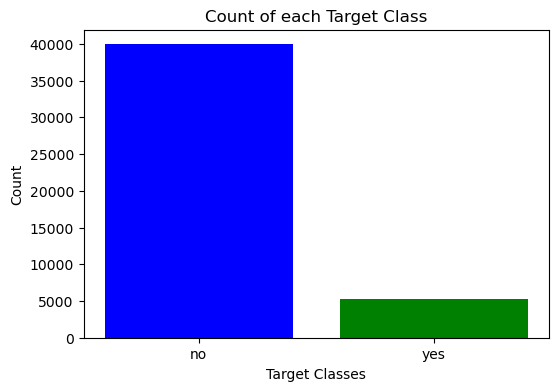

In [53]:
# test if the target is balanced
rcParams['figure.figsize'] = 6,4
plt.bar(df['y'].unique(), df['y'].value_counts(), color = ['b', 'g'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')
plt.show()

What do you notice?

Il y a beaucoup plus de négatifs, ce qui va donc biaiser les modèles vers prédire la classe 0 plus souvent que la classe 1.

The easiest way to rebalance your data is to add the `class_weight='balanced'` parameter to your scikit learn model. The `class_weight` parameter is available in most scikit-learn models, for example look at the Decision Trees doc :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

(There are other techniques for rebalancing the data [here](https://blog.octo.com/donnees-desequilibrees-que-faire/), [here](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) ).

Rebalance the data with the `class_weight` parameter, and you'll have much better f1 and Average Precision metrics.

In [54]:
# Déjà fait tout le long du notebook